実際にgoogle colabで実行するには、以下をクリックして実行してください。

https://colab.research.google.com/github/Shingo425/DataAnalysis/blob/main/src/Logistic_Regression.ipynb#scrollTo=handy-temple

In [1]:
!pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import statsmodels.api as sm
from tqdm.notebook import tqdm

データの読み込み

In [3]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog)
X ,t =  spector_data.exog , spector_data.endog

## シグモイド関数

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

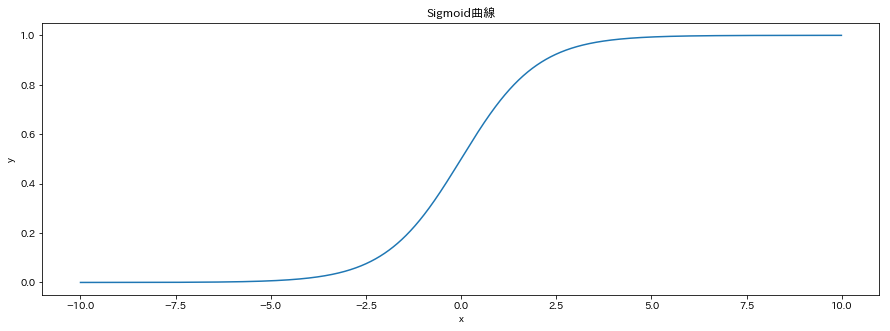

In [5]:
fig,ax = plt.subplots(figsize=(15,5))
x = np.arange(-10,10,0.01)
ax.plot(x,sigmoid(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid曲線")
plt.show()

## 交差エントロピー

交差エントロピーの定義

In [6]:
def cross_entropy_loss(t,y):
    return -np.sum(t*np.log(y)+(1-t)*np.log(1-y))

ラベルが1と0のときの交差エントロピーをグラフ化

In [7]:
y_list = np.arange(0.01,0.99,0.01)
one_list = []
zero_list = []
for y in y_list:
    one_list.append(cross_entropy_loss(1,y))
    zero_list.append(cross_entropy_loss(0,y))


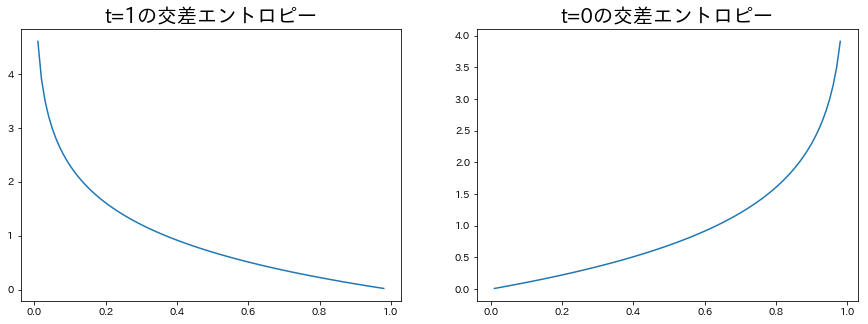

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(y_list,one_list)
ax[0].set_title("t=1の交差エントロピー",fontsize=20)
ax[1].plot(y_list,zero_list)
ax[1].set_title("t=0の交差エントロピー",fontsize=20)
plt.show()

## 勾配降下法によるロジスティック回帰

以下の式で更新します

$\beta_i \leftarrow \beta_i - \alpha\frac{1}{n}\sum_{i=1}^n(y_i-t_i)x_i$

In [9]:
# 学習率
alpha = 0.01
# 初期値
beta = np.array([0.1,0.1,0.1,0.1])
dE = np.array([1,1,1,1])
# 閾値
e = 1e-12

loss = 9999
loss_list = []
for i in tqdm(range(10000000)):
    # 予測値を計算
    y = sigmoid(X @ beta)
    # 更新式をdEに代入
    dE = ((y-t) @ X)/len(y)
    # betaを更新
    beta = beta - alpha * dE
    # 以前出したlossを保存
    loss_mae = loss
    # lossを計算
    loss = cross_entropy_loss(t,y)
    # lossを保存
    loss_list.append(loss)
    # lossの差が閾値以下になったら終了
    if np.abs(loss_mae - loss) < e:
        break
    

  0%|          | 0/10000000 [00:00<?, ?it/s]

In [10]:
loss

12.88963426296252

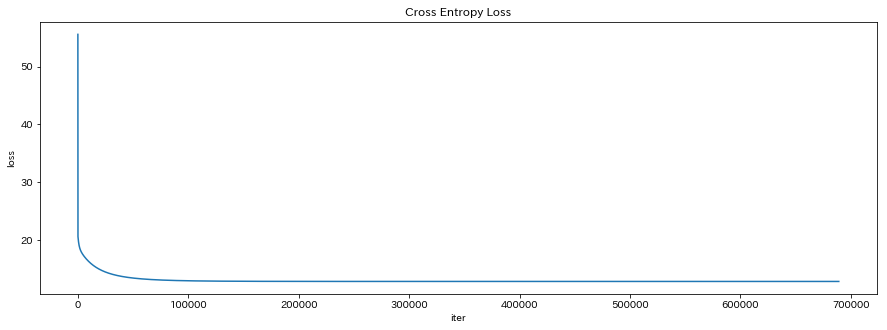

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(np.array(loss_list))
plt.xlabel("iter")
plt.ylabel("loss")
plt.title("Cross Entropy Loss")
plt.show()

In [13]:
beta

array([-13.01993865,   2.82584005,   0.0951388 ,   2.3785462 ])

## statsmodelsによるロジスティック回帰

In [14]:
logit_mod = sm.Logit(t,X)
logit_res = logit_mod.fit(disp=0)
print('Parameters: ', logit_res.params)
print(logit_res.summary())

Parameters:  [-13.02134686   2.82611259   0.09515766   2.37868766]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Mar 2022   Pseudo R-squ.:                  0.3740
Time:                        17:32:36   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
x1             2.8261      1.263      2.238      0.025       0.3

勾配降下法によるロジスティック回帰とstatsmodelsの偏回帰係数がほとんど一緒になることが確認できます。